<a href="https://colab.research.google.com/github/YousefSoltanian/MAE598_Design_Optimization/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inverted Double Pendulum On a Cart**
### **MAE 598, Design Optimization: Project 2 (LQR)**
### Seyed Yousef Soltanian
### Fall 2023


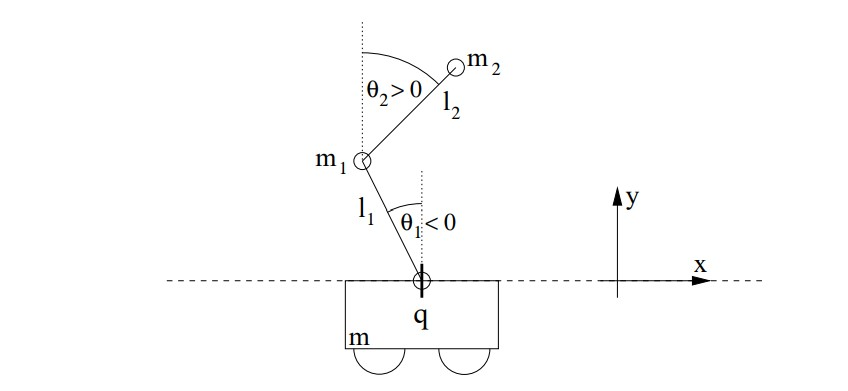



## System Description

Consider a double pendulum mounted on a cart, where the cart has mass $m$ and the pendulum has two rods with lengths $l_1$ and $l_2$. Point masses $m_1$ and $m_2$ are attached to the rods. The rods are assumed to be massless.

## Generalized Coordinates

Let $\theta_1$ and $\theta_2$ be the deviations of the rods from the upright position, and $q$ be the horizontal position of the cart. The system has three generalized coordinates: $q$, $\theta_1$, and $\theta_2$.

## Derivatives

The derivatives with respect to time are denoted as $\dot{q}$, $\dot{\theta}_1$, and $\dot{\theta}_2$.

## Control Input

The control input is denoted as $u(t)$, representing the force applied to the cart.

## External Disturbances

External disturbances $w_1$, $w_2$, $w_3$ act as forces on $q$, $\theta_1$, and $\theta_2$.

## Damping and Friction

Damping coefficients $d_1$, $d_2$, $d_3$ model friction and damping. The friction/damping force of the cart is $-d_1\dot{q}$, and the friction/damping forces in the joints are $-d_2\dot{\theta}_1$ and $-d_3\dot{\theta}_2$.

# System Dynamics

## Kinetic Energy K and Potential Energy P

The kinetic energy of the system is given by:
\begin{equation}
K = \frac{1}{2} \left[ m\dot{q}^2 + m_1(\dot{q} + l_1\dot{\theta}_1\cos\theta_1)^2 + m_2(\dot{q} + l_1\dot{\theta}_1\cos\theta_1 + l_2\dot{\theta}_2\cos\theta_2)^2 \right]
\end{equation}

The potential energy of the system is given by:

\begin{equation}
P = g \left[ m_1l_1\cos\theta_1 + m_2(l_1\cos\theta_1 + l_2\cos\theta_2) \right]
\end{equation}
## Lagrangian Mechanics

The Lagrangian $L$ is defined as the difference between kinetic and potential energy:

\begin{equation}
 L = K - P
\end{equation}

The equations of motion for the cart are derived using the principle of Lagrangian mechanics, resulting in the matrix equation:

\begin{equation}
 M(y)\ddot{y} = f(y, \dot{y}, u, \dot{w})
\end{equation}

where $M(y)$ is an invertible matrix.

## State-Space Equation

Defining the state vector $x = [q, \dot{q}, \theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]$, the state-space equation is given by:

\begin{aligned}\begin{bmatrix} m + m_1 + m_2 & l_1(m_1 + m_2) \cos \theta_1 & m_2l_2 \cos \theta_2 \\ l_1(m_1 + m_2) \cos \theta_1 & l_1^2 (m_1 + m_2) & l_1 l_2 m_2 \cos (\theta_1 - \theta_2) \\ l_2 m_2 \cos \theta_2 & l_1 l_2 m_2 \cos (\theta_1 - \theta_2) & l_2^2 m_2 \end{bmatrix}\begin{bmatrix} \ddot{q} \\ \ddot{\theta}_1 \\ \ddot{\theta}_2 \end{bmatrix}\end{aligned} =
\begin{aligned}
\begin{bmatrix}
l_1(m_1 + m_2)\dot{\theta}_1^2\sin \theta_1 + m_2l_2\dot{\theta}_2^2\sin \theta_2 \\
-l_1l_2m_2\dot{\theta}_2^2\sin(\theta_1 - \theta_2) + gl_1(m_1 + m_2)\sin \theta_1 \\
l_1l_2m_2\dot{\theta}_1^2\sin(\theta_1 - \theta_2) + g l_2 m_2 \sin \theta_2
\end{bmatrix}
-\begin{bmatrix} d_1 \dot{q} \\ d_2 \dot{\theta}_1 \\ d_3 \dot{\theta}_2 \end{bmatrix} + \begin{bmatrix} u \\ 0 \\ 0 \end{bmatrix} + \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix}
\end{aligned}

This system of equations describes the motion of an inverted double pendulum on a cart subject to control input and external disturbances.

## Linearized Dynamic
First wh have to linearized the Matrix $M$:

\begin{aligned}M≈\begin{bmatrix} m + m_1 + m_2 & l_1(m_1 + m_2) & m_2l_2  \\ l_1(m_1 + m_2)  & l_1^2 (m_1 + m_2) & l_1 l_2 m_2  \\ l_2 m_2  & l_1 l_2 m_2 & l_2^2 m_2 \end{bmatrix}\end{aligned}

and for the right hand side and $f(s,u)$ we have:
\begin{aligned}f=\begin{bmatrix}
    u \\
    l_1g(m_1+m_2)\theta_1 \\
    m_2l_2g \theta_2
\end{bmatrix}\end{aligned}

As a result, matrices  $A$ and  $B$ can be calculated as follows: $A=M^{-1}N ,B=M^{-1}F$
 , where

\begin{aligned}M = \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & M+m_1+m_2 & l_1(m_1+m_2) & l_2m_2 \\
    0 & 0 & 0 & l_1(m_1+m_2) & l_1^2(m_1+m_2) & l_1l_2m_2 \\
    0 &  0 & 0 &l_2m_2 & l_1l_2m_2 & l_2^2m_2
\end{bmatrix}\end{aligned}

\begin{aligned}N = \begin{bmatrix}
    0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 \\
    0 & (m_1+m_2)l_1g & 0 & 0 & 0 & 0 \\
    0 &  0 & m_2l_2g & 0 & 0 & 0
\end{bmatrix}\end{aligned}

\begin{aligned} F = \begin{bmatrix}
    0 \\
    0 \\
    0 \\
    1 \\
    0 \\
    0
\end{bmatrix}\end{aligned}

\begin{aligned}
A = M^{-1}N,
B = M^{-1}F.
\end{aligned}

# The Cost Function

The performance of the control system will be evaluated using a cost function in the form of a Linear Quadratic Regulator (LQR) cost function. The cost function is defined as:

\begin{equation}
J = \frac{1}{2}\mathbf{s}^T\mathbf{Q}\mathbf{s} + \frac{1}{2}u^T\mathbf{R}u
\end{equation}

where:
- $\mathbf{s}$ is the vector of states, defined as $\mathbf{s} = [q, \dot{q}, \theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2]$.
- $u$ is the control input.
- $\mathbf{Q}$ and $\mathbf{R}$ are positive definite weighting matrices determining the relative importance of state and control penalties, respectively.

The goal is to design a controller that minimizes this cost function, resulting in a system that behaves optimally according to the chosen criteria.

## Initial States

The system's initial states are set to $\mathbf{s}_0 = [0, 0, 0, 0, 0, 0]$, the goal is to keep the pendulium stable
## Controller Objective

The primary objective of the controller design is to stabilize the system at an unstable equilibrium position where $\theta_1 = 0$ and $\theta_2 = 0$ within a limited time duration $T$.

The stability of the system and the speed of convergence to the desired equilibrium position will be influenced by the choice of weighting matrices $\mathbf{Q}$ and $\mathbf{R}$.

The final state-space equations, incorporating the LQR-based control law, will be derived to achieve this control objective.



## Controller Objective

The ultimate goal of the controller design is to minimize the defined cost function, driving the system from the initial stable equilibrium to the desired unstable equilibrium position. The choice of the weighting the cost function a crucial role in influencing the behavior of the system, affecting stability, and determining the trade-off between minimizing state deviations and control effort.

The proposed energy-based cost formulation serves as a quantitative measure to guide the control strategy towards achieving the specified control objective within the given time frame.


# LQR

\begin{align*}
\text{Minimize:} \quad & J = \sum_{t=0}^{T}\frac{1}{2}\mathbf{s}^T\mathbf{Q}\mathbf{s} + \frac{1}{2}u^T\mathbf{R}u \\
\text{Subject to:} \quad & \mathbf{x}_{t+1} = A \mathbf{x}_t + B u_t, \quad t = 0, 1, \ldots, T-1 \\
& u_{\min} \leq u_t \leq u_{\max}, \quad t = 0, 1, \ldots, T-1
\end{align*}


## Optimization Objective

The objective is to find the optimal control signal $\boldsymbol{u}$ that minimize the defined cost function, guiding the system from the initial stable equilibrium to the desired unstable equilibrium position within the given time duration $T$.

## Constraints

The equality constraints are imposed by the system dynamics equations, ensuring that the optimization respects the physical laws governing the motion of the double pendulum.




In [1]:
import logging
import math
import random
import numpy as np
import time
import torch
import torch.nn as nn
from torch import optim
from torch.nn import utils
import matplotlib.pyplot as plt

!pip install ipywidgets
from ipywidgets import IntProgress
from IPython.display import display
from matplotlib import pyplot as plt, rc
from matplotlib.animation import FuncAnimation, PillowWriter
rc('animation', html='jshtml')
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)

logger = logging.getLogger(__name__)
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 2.7 MB/s eta 0:00:00


In [3]:
import numpy as np
from numpy import sin, cos, pi

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle
plt.style.use('seaborn-whitegrid')


def solve(initial_state, times, integrate_func, derivative_func):
    """
    Solves the initial-value problem of the first order ODEs
    :param initial_state: initial state
    :param times: a sequence of time points for which to solve
    :param integrate_func: calculates the next state
    :param derivative_func: computes derivatives of each state component
    :return:
    """
    dt = times[1] - times[0]
    states = [initial_state]
    for step, t in enumerate(times):
        states.append(integrate_func(states[-1], step, t, dt, derivative_func))
    return np.array(states)

def integrate_rk4(state, step, t, dt, dydx_func):
    """
    Fourth-order Runge-Kutta method.
    Source: https://www.geeksforgeeks.org/runge-kutta-4th-order-method-solve-differential-equation/
    """
    k1 = dydx_func(state, step, t, dt)
    k2 = dydx_func([v + d * dt / 2 for v, d in zip(state, k1)], step, t, dt)
    k3 = dydx_func([v + d * dt / 2 for v, d in zip(state, k2)], step, t, dt)
    k4 = dydx_func([v + d * dt for v, d in zip(state, k3)], step, t, dt)
    return [v + (k1_ + 2 * k2_ + 2 * k3_ + k4_) * dt / 6 for v, k1_, k2_, k3_, k4_ in zip(state, k1, k2, k3, k4)]

<ipython-input-3-68a07f07ec3c>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
# model parameters
M = 5.0
m1 = 2.0
m2 = 1.5
l1 = 0.5
l2 = 0.25
g = 9.81

# initial state
X0 = 0.0  # cart position
dX0 = 0.0  # cart velocity
A0 = -0.2  # angle of the first joint
dA0 = 0.0  # angular velocity of the first joint
B0 = 0.1  # angle of the second joint
dB0 = 0.0  # angular velocity of the second joint

initial_state = np.array([X0, dX0, A0, dA0, B0, dB0])

def derivatives(state, step, t_, dt_):
    x, dx, a, da, b, db = state

    dL_dx = 0.0
    dL_da = -(m1 + m2) * l1 * da * dx * sin(a) + (m1 + m2) * g * l1 * sin(a) - m2 * l1 * l2 * da * db * sin(a - b)
    dL_db = m2 * l2 * (g * sin(b) + l1 * da * db * sin(a - b) - dx * db * sin(b))

    a11 = M + m1 + m2
    a12 = (m1 + m2) * l1 * cos(a)
    a13 = m2 * l2 * cos(b)
    b1 = (m1 + m2) * l1 * da ** 2 * sin(a) + m2 * l2 * db ** 2 * sin(b)

    a21 = (m1 + m2) * l1 * cos(a)
    a22 = (m1 + m2) * l1 ** 2
    a23 = m2 * l1 * l2 * cos(a - b)
    b2 = (m1 + m2) * dx * da * l1 * sin(a) + m2 * l1 * l2 * db * (da - db) * sin(a - b)

    a31 = m2 * l2 * cos(b)
    a32 = m2 * l1 * l2 * cos(a - b)
    a33 = m2 * l2 ** 2
    b3 = m2 * dx * db * l2 * sin(b) + m2 * l1 * l2 * da * (da - db) * sin(a - b)

    A = np.array([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])
    b_vec = np.array([b1 + dL_dx, b2 + dL_da, b3 + dL_db])
    det_A = np.linalg.det(A)

    Ax = np.copy(A)
    Ax[:, 0] = b_vec
    ddx = np.linalg.det(Ax) / det_A

    Aa = np.copy(A)
    Aa[:, 1] = b_vec
    dda = np.linalg.det(Aa) / det_A

    Ab = np.copy(A)
    Ab[:, 2] = b_vec
    ddb = np.linalg.det(Ab) / det_A
    return [dx, ddx, da, dda, db, ddb]

In [5]:
def render(solution):
    x_solution = solution[:, 0]
    a_solution = solution[:, 2]
    b_solution = solution[:, 4]

    skip_frames = 40

    x_solution = x_solution[::skip_frames]
    a_solution = a_solution[::skip_frames]
    b_solution = b_solution[::skip_frames]

    frames = len(x_solution)

    j1_x = l1 * sin(a_solution) + x_solution
    j1_y = l1 * cos(a_solution)

    j2_x = l2 * sin(b_solution) + j1_x
    j2_y = l2 * cos(b_solution) + j1_y

    fig = plt.figure()
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-1, 1))
    ax.set_aspect('equal')
    ax.grid()

    patch = ax.add_patch(Rectangle((0, 0), 0, 0, linewidth=1, edgecolor='k', facecolor='r'))

    line, = ax.plot([], [], 'o-', lw=2)
    time_template = 'time: %.1f s'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    cart_width = 0.15
    cart_height = 0.1


    def init():
        line.set_data([], [])
        time_text.set_text('')
        patch.set_xy((-cart_width / 2, -cart_height / 2))
        patch.set_width(cart_width)
        patch.set_height(cart_height)
        return line, time_text


    def animate(i):
        thisx = [x_solution[i], j1_x[i], j2_x[i]]
        thisy = [0, j1_y[i], j2_y[i]]

        line.set_data(thisx, thisy)
        now = i * skip_frames * dt
        time_text.set_text(time_template % now)

        patch.set_x(x_solution[i] - cart_width / 2)
        return line, time_text, patch


    ani = animation.FuncAnimation(fig, animate, frames=frames,
                                  interval=1, blit=True, init_func=init)
    plt.close(fig)
    return ani


In [9]:
from numpy.linalg import matrix_rank, inv
from control import ctrb, obsv
#calculating matrices A and B
def get_a_b(M, m1, m2, l1, l2):
    X = np.array([
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, M + m1 + m2, l1 * (m1 + m2), l2 * m2],
        [0, 0, 0, l1 * (m1 + m2), l1 ** 2 * (m1 + m2), l1 * l2 * m2],
        [0, 0, 0, l2 * m2, l1 * l2 * m2, l2 ** 2 * m2]
    ], dtype="float64")
    N = np.array([
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0],
        [0, (m1 + m2) * l1 * g, 0, 0, 0, 0],
        [0, 0, m2 * l2 * g, 0, 0, 0]
    ], dtype="float64")
    F = np.array([[0, 0, 0, 1, 0, 0]], dtype="float64").T
    X_inv = inv(X)
    A = X_inv @ N
    B = inv(X) @ F
    return A, B

In [10]:
def check_ctrb_obsv(A, B, C):
    ctrb_matrix = ctrb(A, B)
    obsv_matrix = obsv(A, C)

    print("Controllability matrix rank: %d" % matrix_rank(ctrb_matrix))
    print("Observability matrix rank: %d" % matrix_rank(obsv_matrix))

In [11]:
# rank 6 means the system is controllable and observable
A, B = get_a_b(M, m1, m2, l1, l2)
check_ctrb_obsv(A, B, C=np.array([[1, 1, 1, 0, 0, 0]]))

Controllability matrix rank: 6
Observability matrix rank: 6


In [12]:
import scipy.linalg

def lqr(A, B, Q, R):
    """
        Solve the continuous time lqr controller.
        dx/dt = A x + B u
        cost = integral x.T*Q*x + u.T*R*u
    """
    # ref Bertsekas, p.151
    # first, try to solve the ricatti equation
    X = np.array(scipy.linalg.solve_continuous_are(A, B, Q, R))
    # compute the LQR gain
    K = np.array(scipy.linalg.inv(R) @ (B.T @ X))
    eigVals, eigVecs = scipy.linalg.eig(A - B @ K)
    return K, X, eigVals

In [13]:
def get_lqr_gains(A, B, Q, R):
    K, _, _ = lqr(A, B, Q, R)
    return K

Q = np.array([
    [1000000., .0, .0, .0, .0, .0],
    [.0, 1., .0, .0, .0, .0],
    [.0, .0, 1., .0, .0, .0],
    [.0, .0, .0, 1., .0, .0],
    [.0, .0, .0, .0, 1., .0],
    [.0, .0, .0, .0, .0, 1.],
])

R = np.array([[2000.]])
A, B = get_a_b(M, m1, m2, l1, l2)
K = get_lqr_gains(A, B, Q, R)

In [14]:
disable_control_threshold = 3.0


def get_control(state, t):
    """
    Returns control based on LQR gains and disables after time threshold
    """
    x, dx, a, da, b, db = state
    if t < disable_control_threshold:
        _state = np.array([[x, a, b, dx, da, db]])
        return (-K @ _state.T)[0, 0]
    else:
        return .0

def derivatives(state, step, t_, dt_):
    x, dx, a, da, b, db = state

    u = get_control(state, t_)

    dL_dx = 0.0
    dL_da = -(m1 + m2) * l1 * da * dx * sin(a) + (m1 + m2) * g * l1 * sin(a) - m2 * l1 * l2 * da * db * sin(a - b)
    dL_db = m2 * l2 * (g * sin(b) + l1 * da * db * sin(a - b) - dx * db * sin(b))

    a11 = M + m1 + m2
    a12 = (m1 + m2) * l1 * cos(a)
    a13 = m2 * l2 * cos(b)
    b1 = (m1 + m2) * l1 * da ** 2 * sin(a) + m2 * l2 * db ** 2 * sin(b)

    a21 = (m1 + m2) * l1 * cos(a)
    a22 = (m1 + m2) * l1 ** 2
    a23 = m2 * l1 * l2 * cos(a - b)
    b2 = (m1 + m2) * dx * da * l1 * sin(a) + m2 * l1 * l2 * db * (da - db) * sin(a - b)

    a31 = m2 * l2 * cos(b)
    a32 = m2 * l1 * l2 * cos(a - b)
    a33 = m2 * l2 ** 2
    b3 = m2 * dx * db * l2 * sin(b) + m2 * l1 * l2 * da * (da - db) * sin(a - b)

    A = np.array([[a11, a12, a13], [a21, a22, a23], [a31, a32, a33]])
    b_vec = np.array([b1 + dL_dx + u, b2 + dL_da, b3 + dL_db])
    det_A = np.linalg.det(A)

    Ax = np.copy(A)
    Ax[:, 0] = b_vec
    ddx = np.linalg.det(Ax) / det_A

    Aa = np.copy(A)
    Aa[:, 1] = b_vec
    dda = np.linalg.det(Aa) / det_A

    Ab = np.copy(A)
    Ab[:, 2] = b_vec
    ddb = np.linalg.det(Ab) / det_A
    return [dx, ddx, da, dda, db, ddb]

times = np.linspace(0, 6, 6000)
dt = times[1] - times[0]

solution = solve(initial_state, times, integrate_rk4, derivatives)

CPU times: user 13.1 s, sys: 267 ms, total: 13.3 s
Wall time: 13.4 s


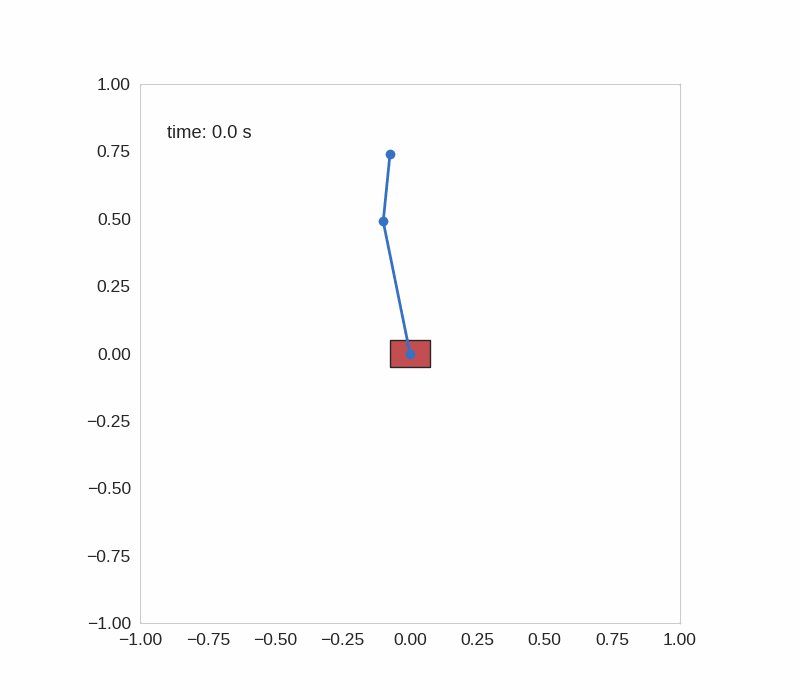

In [16]:
from IPython.display import display, Image
ani = render(solution)
%time ani.save('LQR_DIP.gif', writer='imagemagick', fps=24)
display(Image(filename='LQR_DIP.gif'))